# GTFS Schedule
- Data: https://data.bus-data.dft.gov.uk/timetable/download/
- gtfs-kit: https://gitlab.com/mrcagney/gtfs_kit
- examples: https://gitlab.com/mrcagney/gtfs_kit/-/blob/master/notebooks/examples.ipynb
- docs:https://mrcagney.gitlab.io/gtfs_kit_docs/

## Imports

In [1]:
import warnings

import gtfs_kit as gk
import pandas as pd

In [2]:
warnings.filterwarnings("ignore")

## Load data and filter

Download one of the files from the bottom of the page here:

https://data.bus-data.dft.gov.uk/timetable/download/

In [3]:
path = "../data/itm_south_east_gtfs.zip"
feed = gk.read_feed(path, dist_units="mi")
feed.validate()

,type,message,table,rows
1,error,Invalid route_type; maybe has extra space char...,routes,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
0,warning,Unrecognized column agency_noc,agency,[]
2,warning,"Repeated pair (route_short_name, route_long_name)",routes,"[54, 85, 96, 102, 111, 114, 126, 141, 152, 156..."
4,warning,Unrecognized column stop_direction_name,stop_times,[]
5,warning,"Repeated pair (trip_id, departure_time)",stop_times,"[1639850, 2074744, 1639642, 1659898, 1639122, ..."
3,warning,Unrecognized column platform_code,stops,[]
6,warning,Unrecognized column trip_direction_name,trips,[]
7,warning,Unrecognized column vehicle_journey_code,trips,[]


In [4]:
feed.describe()

,indicator,value
0,agencies,"[National Express, Flixbus, Megabus, New Bhara..."
1,timezone,Europe/London
2,start_date,20221003
3,end_date,20230630
4,num_routes,2156
5,num_trips,121741
6,num_stops,53622
7,num_shapes,3835
8,sample_date,20221006
9,num_routes_active_on_sample_date,1834


In [5]:
agencies = [
    "OP376",  # oxford bus company
    "OP83",  # stagecoach oxfordshire
]
routes = ["5", "5A", "1", "10"]

In [6]:
cow = feed.routes[
    (feed.routes.agency_id.isin(agencies)) & (feed.routes.route_short_name.isin(routes))
]
cow

,route_id,agency_id,route_short_name,route_long_name,route_type
568,50065,OP376,5A,NaN,3
569,14187,OP376,5,NaN,3
921,4824,OP83,10,NaN,3
1413,3815,OP83,1,NaN,3


In [7]:
route_ids = cow.route_id.unique().tolist()
route_ids

['50065', '14187', '4824', '3815']

## Map

In [8]:
# feed.map_routes(["14187", "4824", "3815"], include_stops=True)

## Time series

In [9]:
week = feed.get_first_week()
# dates = [week[4]]
dates = week

In [10]:
trip_stats = feed.compute_trip_stats(route_ids=route_ids)
trip_stats.head()

,trip_id,route_id,route_short_name,route_type,direction_id,shape_id,num_stops,start_time,end_time,start_stop_id,end_stop_id,is_loop,duration,distance,speed
512,VJ58713448d5f378462f099d9dce4881ea40b7e37f,14187,5,3,NaN,RPSP5bb474e47cb094f691802a7013ce93f78a4bd71f,35,04:50:00,05:21:00,340001230ERB,340000006R2,0,0.516667,NaN,NaN
1049,VJb6cffc25011e1e3fee18dcf6bfe52af29f5d693f,14187,5,3,NaN,RPSP5bb474e47cb094f691802a7013ce93f78a4bd71f,35,04:50:00,05:26:00,340001230ERB,340000006R2,0,0.600000,NaN,NaN
202,VJ22218363b595aded4963f38736ffd744d354c737,14187,5,3,NaN,RPSP5bb474e47cb094f691802a7013ce93f78a4bd71f,35,05:10:00,05:42:00,340001230ERB,340000006R2,0,0.533333,NaN,NaN
851,VJ9458bc908698bd6e70dc0357ea6233a9173610a2,14187,5,3,NaN,RPSP5bb474e47cb094f691802a7013ce93f78a4bd71f,35,05:10:00,05:46:00,340001230ERB,340000006R2,0,0.600000,NaN,NaN
979,VJa8223f59ba5aa5b713b520ed7844897640f7d74d,14187,5,3,NaN,RPSP5bb474e47cb094f691802a7013ce93f78a4bd71f,35,05:30:00,06:02:00,340001230ERB,340000006R2,0,0.533333,NaN,NaN


In [11]:
fts = feed.compute_feed_time_series(trip_stats, dates, freq="10Min")
fts.head()

indicator,num_trip_ends,num_trip_starts,num_trips,service_distance,service_duration,service_speed
datetime,,,,,,
2022-10-03 00:00:00,0,0,5,14.751602,1.000000,14.751602
2022-10-03 00:10:00,0,0,1,7.488366,0.433333,17.280844
2022-10-03 00:20:00,0,0,0,0.264895,0.016667,15.893707
2022-10-03 00:30:00,0,0,0,0.000000,0.000000,0.000000
2022-10-03 00:40:00,0,0,0,0.000000,0.000000,0.000000


<AxesSubplot: xlabel='datetime'>

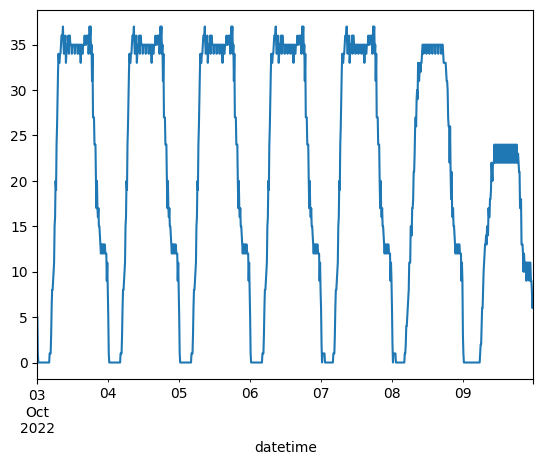

In [12]:
fts.num_trips.plot()

In [13]:
feed_stats = feed.compute_feed_stats(trip_stats, week)
feed_stats

,num_stops,num_routes,num_trips,num_trip_starts,num_trip_ends,service_distance,service_duration,service_speed,peak_num_trips,peak_start_time,peak_end_time,date
0,53217,4,605,605,597,4562.26350,439.966667,10.369566,32,08:15:00,08:16:00,20221003
0,53217,4,605,605,597,4562.26350,439.966667,10.369566,32,08:15:00,08:16:00,20221004
0,53217,4,605,605,597,4562.26350,439.966667,10.369566,32,08:15:00,08:16:00,20221005
0,53217,4,605,605,597,4562.26350,439.966667,10.369566,32,08:15:00,08:16:00,20221006
0,53217,4,607,607,597,4586.30870,441.366667,10.391153,32,08:15:00,08:16:00,20221007
0,53217,4,579,579,570,4350.50005,399.733333,10.883506,29,10:12:00,10:15:00,20221008
0,53217,4,382,382,376,2983.54181,263.333333,11.329906,20,10:56:00,11:00:00,20221009


In [14]:
rts = feed.compute_route_time_series(trip_stats, dates, freq="1H")
rts.head()

indicator           num_trip_ends                 num_trip_starts            \
route_id                    14187 3815 4824 50065           14187 3815 4824   
datetime                                                                      
2022-10-03 00:00:00             0    0    0     0               0    0    0   
2022-10-03 01:00:00             0    0    0     0               0    0    0   
2022-10-03 02:00:00             0    0    0     0               0    0    0   
2022-10-03 03:00:00             0    0    0     0               0    0    0   
2022-10-03 04:00:00             0    1    0     0               1    3    3   

indicator                 num_trips       ... service_distance        \
route_id            50065     14187 3815  ...             4824 50065   
datetime                                  ...                          
2022-10-03 00:00:00     0         0    0  ...          4.01355   0.0   
2022-10-03 01:00:00     0         0    0  ...          0.00000   0.0   
2022-10-03 02:00:00     0         0    0  ...          0.00000   0.0   
2022-10-03 03:00:00     0         0    0  ...          0.00000   0.0   
2022-10-03 04:00:00     0         1    3  ...         11.06208   0.0   

indicator           service_duration                       service_speed  \
route_id                       14187      3815  4824 50065         14187   
datetime                                                                   
2022-10-03 00:00:00         0.366667  0.683333  0.25  0.15     15.893707   
2022-10-03 01:00:00         0.000000  0.000000  0.00  0.00      0.000000   
2022-10-03 02:00:00         0.000000  0.000000  0.00  0.00      0.000000   
2022-10-03 03:00:00         0.000000  0.000000  0.00  0.00      0.000000   
2022-10-03 04:00:00         0.166667  0.983333  0.60  0.00      0.000000   

indicator                                      
route_id                  3815     4824 50065  
datetime                                       
2022-10-03 00:00:00  18.532127  16.0542   0.0  
2022-10-03 01:00:00   0.000000   0.0000   0.0  
2022-10-03 02:00:00   0.000000   0.0000   0.0  
2022-10-03 03:00:00   0.000000   0.0000   0.0  
2022-10-03 04:00:00  20.227092  18.4368   0.0  

[5 rows x 24 columns]

In [15]:
inds = ["num_trips"]
trips = rts.loc[:, (inds, route_ids)]
trips.head()

indicator           num_trips                
route_id                50065 14187 4824 3815
datetime                                     
2022-10-03 00:00:00         0     0    0    0
2022-10-03 01:00:00         0     0    0    0
2022-10-03 02:00:00         0     0    0    0
2022-10-03 03:00:00         0     0    0    0
2022-10-03 04:00:00         0     1    3    3

<AxesSubplot: xlabel='datetime'>

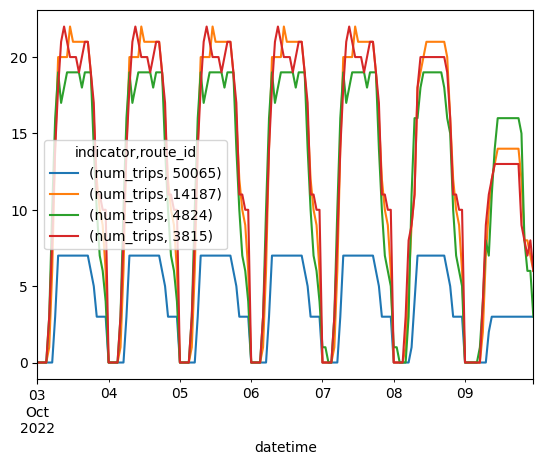

In [16]:
trips.plot()

In [17]:
tt = feed.build_route_timetable(route_ids[1], dates)
tt.head()

,route_id,service_id,trip_id,trip_headsign,block_id,shape_id,wheelchair_accessible,trip_direction_name,vehicle_journey_code,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,stop_direction_name,date
653599,14187,177,VJb6cffc25011e1e3fee18dcf6bfe52af29f5d693f,Oxford City Centre,NaN,RPSP5bb474e47cb094f691802a7013ce93f78a4bd71f,0,NaN,VJ_49-5-O-y10-1-507-T0,04:50:00,04:50:00,340001230ERB,0,NaN,0,1,NaN,1,NaN,20221003
653600,14187,177,VJb6cffc25011e1e3fee18dcf6bfe52af29f5d693f,Oxford City Centre,NaN,RPSP5bb474e47cb094f691802a7013ce93f78a4bd71f,0,NaN,VJ_49-5-O-y10-1-507-T0,04:50:30,04:50:30,340001219CNR,1,NaN,0,0,NaN,1,NaN,20221003
653601,14187,177,VJb6cffc25011e1e3fee18dcf6bfe52af29f5d693f,Oxford City Centre,NaN,RPSP5bb474e47cb094f691802a7013ce93f78a4bd71f,0,NaN,VJ_49-5-O-y10-1-507-T0,04:51:00,04:51:00,340001234CNR,2,NaN,0,0,NaN,1,NaN,20221003
653602,14187,177,VJb6cffc25011e1e3fee18dcf6bfe52af29f5d693f,Oxford City Centre,NaN,RPSP5bb474e47cb094f691802a7013ce93f78a4bd71f,0,NaN,VJ_49-5-O-y10-1-507-T0,04:52:00,04:52:00,340001229CNR,3,NaN,0,0,NaN,1,NaN,20221003
653603,14187,177,VJb6cffc25011e1e3fee18dcf6bfe52af29f5d693f,Oxford City Centre,NaN,RPSP5bb474e47cb094f691802a7013ce93f78a4bd71f,0,NaN,VJ_49-5-O-y10-1-507-T0,04:54:00,04:55:00,340001224CNR,4,NaN,0,0,NaN,1,NaN,20221003


In [18]:
# tt.vehicle_journey_code.unique()

In [19]:
tt.loc[tt.vehicle_journey_code == "VJ_49-5-O-y10-1-658-T0,VJ_49-5-O-y10-1-838-T2"].head()

,route_id,service_id,trip_id,trip_headsign,block_id,shape_id,wheelchair_accessible,trip_direction_name,vehicle_journey_code,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,stop_direction_name,date
652374,14187,176,VJe727e4d0c5a6756ad3666bd780624e0bbfa1ee5c,Oxford City Centre,NaN,RPSP5bb474e47cb094f691802a7013ce93f78a4bd71f,0,NaN,"VJ_49-5-O-y10-1-658-T0,VJ_49-5-O-y10-1-838-T2",12:33:00,12:33:00,340001230ERB,0,NaN,0,1,NaN,1,NaN,20221003
652375,14187,176,VJe727e4d0c5a6756ad3666bd780624e0bbfa1ee5c,Oxford City Centre,NaN,RPSP5bb474e47cb094f691802a7013ce93f78a4bd71f,0,NaN,"VJ_49-5-O-y10-1-658-T0,VJ_49-5-O-y10-1-838-T2",12:33:30,12:33:30,340001219CNR,1,NaN,0,0,NaN,1,NaN,20221003
652376,14187,176,VJe727e4d0c5a6756ad3666bd780624e0bbfa1ee5c,Oxford City Centre,NaN,RPSP5bb474e47cb094f691802a7013ce93f78a4bd71f,0,NaN,"VJ_49-5-O-y10-1-658-T0,VJ_49-5-O-y10-1-838-T2",12:34:00,12:34:00,340001234CNR,2,NaN,0,0,NaN,1,NaN,20221003
652377,14187,176,VJe727e4d0c5a6756ad3666bd780624e0bbfa1ee5c,Oxford City Centre,NaN,RPSP5bb474e47cb094f691802a7013ce93f78a4bd71f,0,NaN,"VJ_49-5-O-y10-1-658-T0,VJ_49-5-O-y10-1-838-T2",12:35:00,12:35:00,340001229CNR,3,NaN,0,0,NaN,1,NaN,20221003
652378,14187,176,VJe727e4d0c5a6756ad3666bd780624e0bbfa1ee5c,Oxford City Centre,NaN,RPSP5bb474e47cb094f691802a7013ce93f78a4bd71f,0,NaN,"VJ_49-5-O-y10-1-658-T0,VJ_49-5-O-y10-1-838-T2",12:37:00,12:40:00,340001224CNR,4,NaN,0,0,NaN,1,NaN,20221003


## Explore

In [20]:
feed.stop_times.loc[
    feed.stop_times.trip_id == "VJ34cb93dfc56cd5c7988c3d82e65bae84a291dcfc"
].head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,stop_direction_name
656014,VJ34cb93dfc56cd5c7988c3d82e65bae84a291dcfc,08:53:00,08:53:00,340001230ERB,0,NaN,0,1,NaN,1,NaN
656015,VJ34cb93dfc56cd5c7988c3d82e65bae84a291dcfc,08:53:30,08:53:30,340001219CNR,1,NaN,0,0,NaN,1,NaN
656016,VJ34cb93dfc56cd5c7988c3d82e65bae84a291dcfc,08:54:00,08:54:00,340001234CNR,2,NaN,0,0,NaN,1,NaN
656017,VJ34cb93dfc56cd5c7988c3d82e65bae84a291dcfc,08:55:00,08:55:00,340001229CNR,3,NaN,0,0,NaN,1,NaN
656018,VJ34cb93dfc56cd5c7988c3d82e65bae84a291dcfc,08:57:00,09:00:00,340001224CNR,4,NaN,0,0,NaN,1,NaN


In [21]:
feed.stop_times.loc[
    (feed.stop_times.stop_sequence == 0)
    & (
        feed.stop_times.trip_id.isin(
            feed.trips.loc[
                (feed.trips.route_id == "14187")
                & (feed.trips.trip_headsign == "Oxford City Centre")
            ].trip_id
        )
    )
].sort_values(by="departure_time").head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,stop_direction_name
655909,VJ58713448d5f378462f099d9dce4881ea40b7e37f,04:50:00,04:50:00,340001230ERB,0,NaN,0,1,NaN,1,NaN
653599,VJb6cffc25011e1e3fee18dcf6bfe52af29f5d693f,04:50:00,04:50:00,340001230ERB,0,NaN,0,1,NaN,1,NaN
655524,VJ22218363b595aded4963f38736ffd744d354c737,05:10:00,05:10:00,340001230ERB,0,NaN,0,1,NaN,1,NaN
653739,VJ9458bc908698bd6e70dc0357ea6233a9173610a2,05:10:00,05:10:00,340001230ERB,0,NaN,0,1,NaN,1,NaN
655559,VJa8223f59ba5aa5b713b520ed7844897640f7d74d,05:30:00,05:30:00,340001230ERB,0,NaN,0,1,NaN,1,NaN


In [22]:
trip_ids = feed.trips.loc[
    (feed.trips.route_id == "14187")
]  # & (feed.trips.trip_id == "VJ34cb93dfc56cd5c7988c3d82e65bae84a291dcfc")]
trip_ids.head()

,route_id,service_id,trip_id,trip_headsign,block_id,shape_id,wheelchair_accessible,trip_direction_name,vehicle_journey_code
20620,14187,209,VJa9bd058beaf18cd6bfdb588d89e448f845c65a1f,Oxford City Centre,NaN,RPSP5bb474e47cb094f691802a7013ce93f78a4bd71f,0,NaN,VJ_49-5-O-y10-1-1013-UG
20621,14187,209,VJ4096619bd29501c05f2ce7a46390319403bc9dbe,Oxford City Centre,NaN,RPSP5bb474e47cb094f691802a7013ce93f78a4bd71f,0,NaN,VJ_49-5-O-y10-1-1038-UG
20622,14187,209,VJa6b7f927ca887c98b4aeef34ffe0d8421f119da1,Oxford City Centre,NaN,RPSP5bb474e47cb094f691802a7013ce93f78a4bd71f,0,NaN,VJ_49-5-O-y10-1-1089-UG
20623,14187,209,VJ5bbe76a6b820555f623f6a36fb97344e2260f6df,Oxford City Centre,NaN,RPSP5bb474e47cb094f691802a7013ce93f78a4bd71f,0,NaN,VJ_49-5-O-y10-1-1100-UG
20624,14187,209,VJ5dc696afd026863fa76f8c3b56cb4320af4d21dd,Oxford City Centre,NaN,RPSP5bb474e47cb094f691802a7013ce93f78a4bd71f,0,NaN,VJ_49-5-O-y10-1-1015-UG


In [23]:
# feed.stop_times.loc[feed.stop_times.trip_id.isin(trip_ids)]